In [2]:
# install library
!pip install pandas openpyxl nltk scikit-learn afinn xgboost SVM

# Import Basic library for NLP
import pandas as pd 
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt # For performance measures
import seaborn as sns # For performance measures

# Import Library for pre-processing and feature enginnering
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.util import ngrams
from nltk import pos_tag



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Input dataset and define dataset size
# Simple EDA to check classes

# Dataset can be found in https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch/data
df = pd.read_csv('Suicide_Detection.csv') 
df=pd.read_csv('Suicide_Detection.csv')
print(df.shape)
df =df.head(20000) 
print(df.shape)
class_counts = df['class'].value_counts()
print(class_counts)
df.info()

#df.to_csv('Suicide_Detection_Reduced.csv', index=False) #Reducing size for uploading purposes

(10000, 3)
(10000, 3)
class
non-suicide    5085
suicide        4915
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [27]:
# Pre-processing: data cleaning

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenisation
    tokens = word_tokenize(text)
    # Remove stopwords, punctuation, and convert text to lowercase
    clean_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(clean_tokens)
    # Lemmatising each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    return ' '.join(lemmatized_tokens)

df['clean_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        Ex Wife Threatening SuicideRecently I left my ...
1        Am I weird I don't get affected by compliments...
2        Finally 2020 is almost over... So I can never ...
3                i need helpjust help me im crying so hard
4        I’m so lostHello, my name is Adam (16) and I’v...
                               ...                        
19995    I just wish I wasn't like thisI read a lot of ...
19996    Future druggie?Why do i see the only reason to...
19997    I just tried to kill myself. Help.I just tried...
19998    Someone downvoted my post about me being a pie...
19999    Here's a question: If a straight guy dates a g...
Name: text, Length: 20000, dtype: object
0        ex wife threatening suiciderecently left wife ...
1        weird get affected compliments coming someone ...
2        finally almost never hear bad year ever swear ...
3                        need helpjust help im crying hard
4        losthello name adam struggling years afraid pa...
               


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


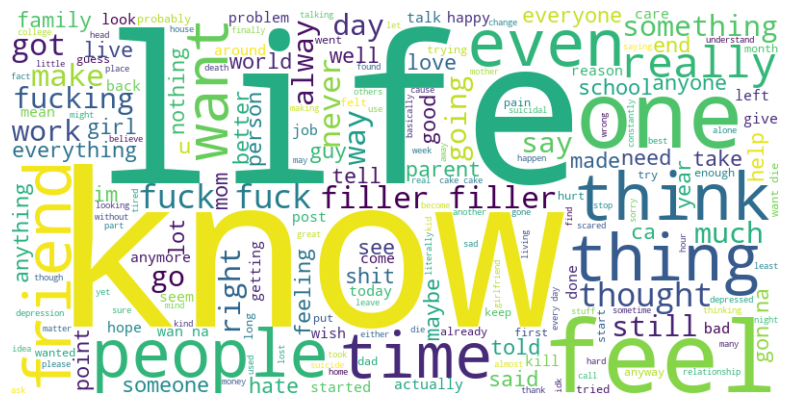

In [4]:
# Brief EDA

# Visually check on both text data before and after the pre-processing
print(df.text)
print(df.clean_text)


# Checking for top 20 most frequently used words
from collections import Counter
words = ' '.join(df['clean_text']).split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)
print(common_words)

!pip install wordcloud
from wordcloud import WordCloud
# Visual for most frequent used words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [5]:
# Import Libraries for Testing

# Lexicon
from afinn import Afinn # AFINN Lexicon for sentiment analysis

# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer # For TF-IDF feature engineering
from nltk.util import ngrams
from nltk import pos_tag

# Models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# For Test and train data preparation as well as result validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix




In [6]:
# Creating function for POS feature 
nltk.download('averaged_perceptron_tagger')
def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

df['pos_tags'] = df['clean_text'].apply(pos_tagging)  # Applying POS tagging 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
# NLP Approach Variation

In [8]:
# Sentiment Analysis Approach
# Defines AFINN lexicon Models
afinn = Afinn()

# Calculate sentiment scores for each token in the cleaned text column
df['afinn_score'] = df['clean_text'].apply(afinn.score)

# Converting sentiment scores into suicide class
def classify_sentiment(score):
    if score > 0:
        return 'Non-suicide'
    elif score < 0:
        return 'suicide'
    else:
        return 'Non-suicide'

# Converting suicide classes from the target column into numberical form
def map_sentiment_to_class(sentiment):
    if sentiment == "suicide":
        return 1  # Assign 1 for "suicide" class
    else:
        return 0  # Assign 0 for "non-suicide" class

# Apply the classification function to create a 'sentiment' column
df['sentiment'] = df['afinn_score'].apply(classify_sentiment)
df['sentiment'] = df['sentiment'].apply(map_sentiment_to_class)

# Apply the mapping function to create a 'class' column
df['class_encoded'] = df['class'].apply(map_sentiment_to_class)

# Split the data into training and testing sets
X = df['clean_text']
y = df['sentiment'] 
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=42)

# Set the target for validation 
z_test = df.loc[X_test.index, 'class_encoded']
z_test = z_test.to_numpy()

In [9]:
# Emotion Detection Approach
# Define NRC emotion lexicon
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None)
nrc_lexicon.columns = ['word', 'emotion', 'score']

# Filter the lexicon to keep only words with strong emotions
nrc_lexicon = nrc_lexicon[nrc_lexicon['score'] == 1]

# Create a set of words for each emotion category
emotion_categories = ['joy', 'sadness', 'surprise', 'fear', 'disgust', 'anger']
emotion_words = {emotion: set(nrc_lexicon[nrc_lexicon['emotion'] == emotion]['word']) 
                 for emotion in emotion_categories}

# Define a function to classify text into emotion classes
def classify_emotion(text):
    words = set(word_tokenize(text))
    for emotion in emotion_categories:
        if len(words.intersection(emotion_words[emotion])) > 0:
            return emotion
    return 'neutral'

# Define a mapping function to convert sentiment to class labels
def map_sentiment_to_class(sentiment):
    if sentiment == "suicide":
        return 1  # Assign 1 for "suicide" class
    else:
        return 0  # Assign 0 for "non-suicide" class

# Apply the emotion classification function to create an 'emotion' column
df['emotion'] = df['clean_text'].apply(classify_emotion)
print(df['emotion'].value_counts())

# Map emotions to classes (0 for joy and surprise, 1 for others)
def map_emotion_to_class(emotion):
    if emotion in ['joy', 'surprise','neutral']:
        return 0
    else:
        return 1
        
df['emotion_class'] = df['emotion'].apply(map_emotion_to_class)

# Apply the mapping function to create a 'class' column
df['class_encoded'] = df['class'].apply(map_sentiment_to_class)

# Split the data into training and testing sets
X = df['clean_text']
y = df['emotion_class'] 
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=42)

# Set the target for validation 
z_test = df.loc[X_test.index, 'class_encoded']
z_test = z_test.to_numpy()

emotion
joy         12167
sadness      3816
neutral      2874
fear          448
disgust       347
surprise      228
anger         120
Name: count, dtype: int64


In [10]:
# Hybrid Approach (Sentiment Analysis + Emotion Detection)
# Define NRC emotion lexicon
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None)
nrc_lexicon.columns = ['word', 'emotion', 'score']

# Filter the lexicon to keep only words with strong emotions
nrc_lexicon = nrc_lexicon[nrc_lexicon['score'] == 1]

# Create a set of words for each emotion category
emotion_categories = ['joy', 'sadness', 'surprise', 'fear', 'disgust', 'anger', 'positive', 'negative']
emotion_words = {emotion: set(nrc_lexicon[nrc_lexicon['emotion'] == emotion]['word']) for emotion in emotion_categories}

# Define a function to classify text into emotion classes
def classify_emotion(text):
    words = set(word_tokenize(text))
    for emotion in emotion_categories:
        if len(words.intersection(emotion_words[emotion])) > 0:
            return emotion
    return 'neutral'

# Define a mapping function to convert sentiment to class labels
def map_sentiment_to_class(sentiment):
    if sentiment == "suicide":
        return 1  # Assign 1 for "suicide" class
    else:
        return 0  # Assign 0 for "non-suicide" class

# Apply the emotion classification function to create an 'emotion' column
df['emotion'] = df['clean_text'].apply(classify_emotion)
print(df['emotion'].value_counts())

# Map emotions to classes (0 for joy and surprise, 1 for others)
def map_emotion_to_class(emotion):
    if emotion in ['joy', 'surprise', 'positive', 'neutral']:
        return 0
    else:
        return 1

# Apply the emotion classification function to create an 'emotion' column
df['emotion'] = df['clean_text'].apply(classify_emotion)
df['emotion_sentiment_class'] = df['emotion'].apply(map_emotion_to_class)

df['emotion_class'] = df['emotion'].apply(map_emotion_to_class)

# Apply the mapping function to create a 'class' column
df['class_encoded'] = df['class'].apply(map_sentiment_to_class)

# Split the data into training and testing sets
X = df['clean_text']
y = df['emotion_class'] 
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=42)

# Set the target for validation 
z_test = df.loc[X_test.index, 'class_encoded']
z_test = z_test.to_numpy()

emotion
joy         12167
sadness      3816
neutral      1688
positive      938
fear          448
disgust       347
negative      248
surprise      228
anger         120
Name: count, dtype: int64


In [11]:
# Featuring Engineering settings' variations

In [12]:
# Use TF-IDF 
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
# Use TF-IDF + POS
df['pos_tags_str'] = df['pos_tags'].apply(lambda tags: ' '.join([tag[1] for tag in tags]))
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train + ' ' + df.loc[X_train.index, 'pos_tags_str'])
X_test_tfidf = tfidf_vectorizer.transform(X_test + ' ' + df.loc[X_test.index, 'pos_tags_str'])

In [14]:
# Use TF-IDF + POS + N-grams
df['pos_tags_str'] = df['pos_tags'].apply(lambda tags: ' '.join([tag[1] for tag in tags]))
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))  # Include both unigrams, bigrams, and trigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train + ' ' + df.loc[X_train.index, 'pos_tags_str'])
X_test_tfidf = tfidf_vectorizer.transform(X_test + ' ' + df.loc[X_test.index, 'pos_tags_str'])

In [15]:
# Training, machine learning models' variation/choices

In [16]:
# Create and train an XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)
# Predict sentiment on the test set
y_pred = xgb_classifier.predict(X_test_tfidf)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [17]:
# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
# Predict class on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

In [18]:
# Create and train a RF classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
# Predict class on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

In [19]:
# Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train_tfidf, y_train)
# Predict class on the test set
y_pred = knn_classifier.predict(X_test_tfidf)

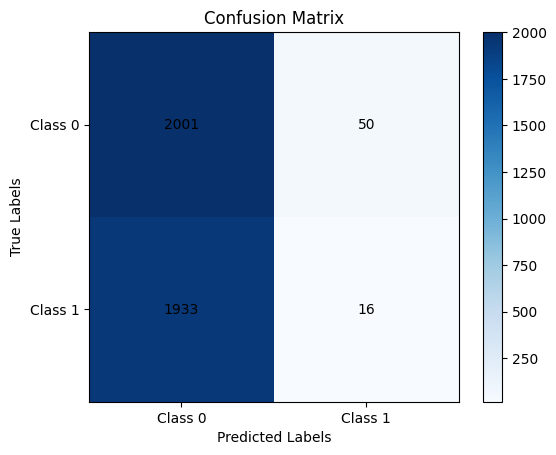

Accuracy: 0.50425
Precision: 0.242
Recall: 0.008
F1-score: 0.016


In [20]:
# Testing stage:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(z_test, y_pred)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
# Display the values in matrix form
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Calculate all the performance measures
accuracy = accuracy_score(z_test, y_pred)
precision = precision_score(z_test, y_pred, average='binary', pos_label=1)
recall = recall_score(z_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(z_test, y_pred, average='binary', pos_label=1)

# All in three decimal places
precision = round(precision, 3)
recall = round(recall, 3)
f1 = round(f1, 3)

# Print all the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")